In [1]:
#Unit 4
#Jeremy Koertzen
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
%matplotlib inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
#Relaxation function:

def relaxation(v,convergence):
    v_old = v
    counter = 0
    #for i in range(1000):
    while True:
        #Using np.roll
        counter += 1
        xshiftR = np.roll(v_old,1,1)
        xshiftL = np.roll(v_old,-1,1)
        yshiftR = np.roll(v_old,1,0)
        yshiftL = np.roll(v_old,-1,0)
        #Creating the updated grid
        v_new = 0.25*(xshiftR + xshiftL + yshiftR + yshiftL)
        #Setting the boundaries to be 1:
        v_new[20,20:30] = 1
        v_new[-21,20:31] = 1
        v_new[20:30,20] = 1
        v_new[20:30,-21] = 1

        v_new[0,:] = 0
        v_new[-1,:] = 0
        v_new[:,0] = 0
        v_new[:,-1] = 0

        test = np.abs((v_old - v_new) / v_old)
        masked = ma.masked_invalid(test)
        #print('convergence: ',masked)
        if(counter > 10):
            if(np.max(masked) < convergence):
                break
        v_old = v_new
    return v_new


[[-25 -24 -23 ...  23  24  25]
 [-25 -24 -23 ...  23  24  25]
 [-25 -24 -23 ...  23  24  25]
 ...
 [-25 -24 -23 ...  23  24  25]
 [-25 -24 -23 ...  23  24  25]
 [-25 -24 -23 ...  23  24  25]]


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\1417056744.py:27: RuntimeWarning: divide by zero encountered in divide
  test = np.abs((v_old - v_new) / v_old)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\1417056744.py:27: RuntimeWarning: invalid value encountered in divide
  test = np.abs((v_old - v_new) / v_old)


Text(0.5, 1.0, 'Cross section of potential')

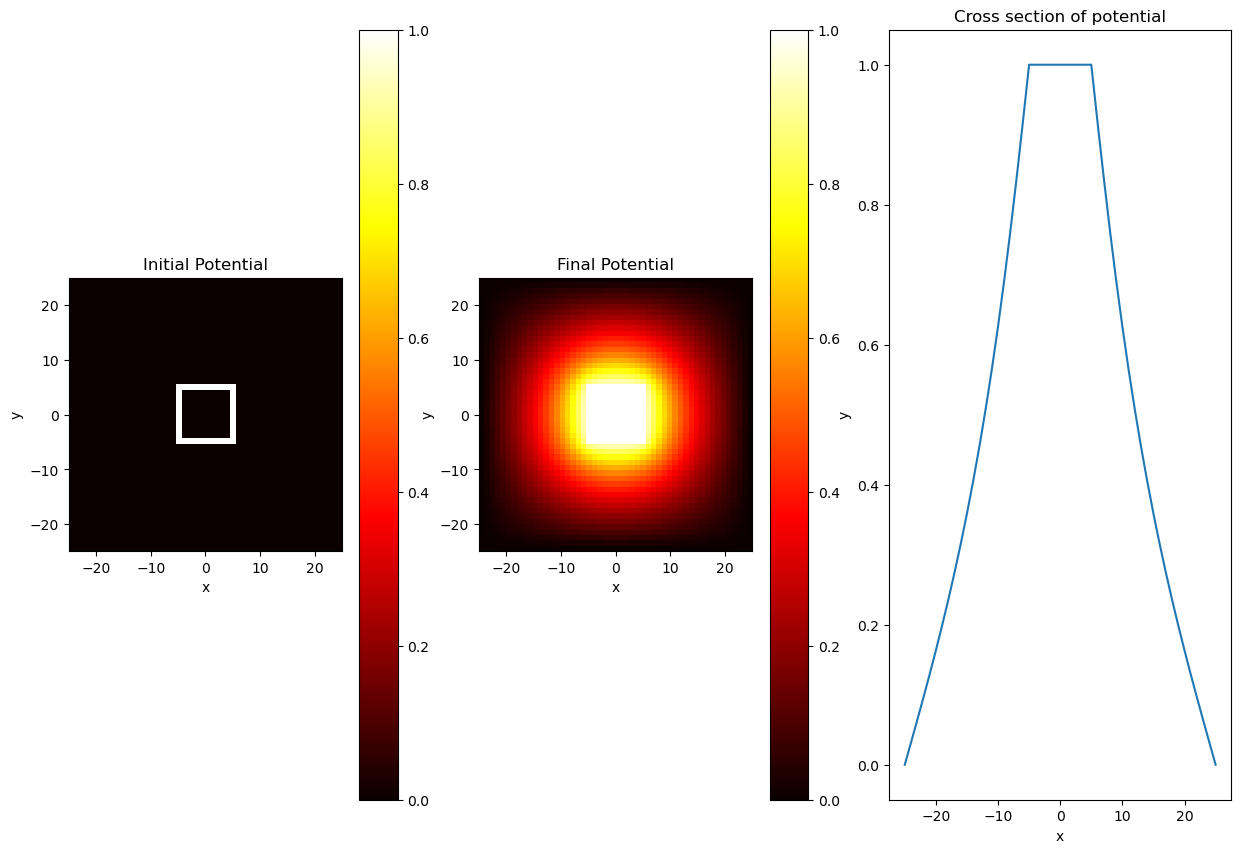

In [14]:
#Problem 1:

#Setting up the image:

fig, axs = plt.subplots(1,3,figsize = [15,10])

#Creating the coordinates:

coords = np.mgrid[-25:26,-25:26]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

print(xgrid)

#Creating the potential array:

V = np.zeros((51,51))
V[20,20:30] = 1
V[-21,20:31] = 1
V[20:30,20] = 1
V[20:30,-21] = 1

V_old = np.copy(V)

V_new = relaxation(V,0.001)

image1 = axs[0].imshow(V_old,extent=[-25,25,-25,25],origin='lower',cmap = 'hot')
image2 = axs[1].imshow(V_new,extent=[-25,25,-25,25],origin='lower',cmap = 'hot')
fig.colorbar(image1,ax = axs[0])
fig.colorbar(image2,ax = axs[1])

y = V_new[25,:]
x = np.linspace(-25,25,51)

image3 = axs[2].plot(x,y)

#Setting the axis labels:

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Initial Potential')

axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Final Potential')

axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Cross section of potential')


In [4]:
#Updated Relaxation Function:

def create_potentialgrid(R,s):
    v = np.zeros((2*R,2*R))
    v[R+s,R-s:R+s] = 1
    v[R-s,R-s:R+s] = 1
    v[R-s:R+s+1,R+s] = 1
    v[R-s:R+s,R-s] = 1
    return v

def relaxation_new(v,R,s,convergence):
    v_old = v
    counter = 0
    #for i in range(1000):
    while True:
        #Using np.roll
        counter += 1
        xshiftR = np.roll(v_old,1,1)
        xshiftL = np.roll(v_old,-1,1)
        yshiftR = np.roll(v_old,1,0)
        yshiftL = np.roll(v_old,-1,0)
        
        #Creating the updated grid
        v_new = 0.25*(xshiftR + xshiftL + yshiftR + yshiftL)
        
        #Setting the boundaries to be 1:
        v_new[R+s,R-s:R+s] = 1
        v_new[R-s,R-s:R+s] = 1
        v_new[R-s:R+s+1,R+s] = 1
        v_new[R-s:R+s,R-s] = 1

        v_new[0,:] = 0
        v_new[-1,:] = 0
        v_new[:,0] = 0
        v_new[:,-1] = 0

        test = np.abs((v_old - v_new) / v_old)
        masked = ma.masked_invalid(test)
        #print('convergence: ',masked)
        if(counter > 10):
            if(np.max(masked) < convergence):
                print('Number of pixels: ',4*R*R)
                print('Iterations for R=',R,':',counter)
                print('Iterations per pixel: ',counter/(4*R*R))
                break
        v_old = v_new
    return v_new


Number of pixels:  2500
Iterations for R= 25 : 567
Iterations per pixel:  0.2268


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\2335465978.py:37: RuntimeWarning: divide by zero encountered in divide
  test = np.abs((v_old - v_new) / v_old)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\2335465978.py:37: RuntimeWarning: invalid value encountered in divide
  test = np.abs((v_old - v_new) / v_old)


Text(0.5, 1.0, 'Cross section of potential')

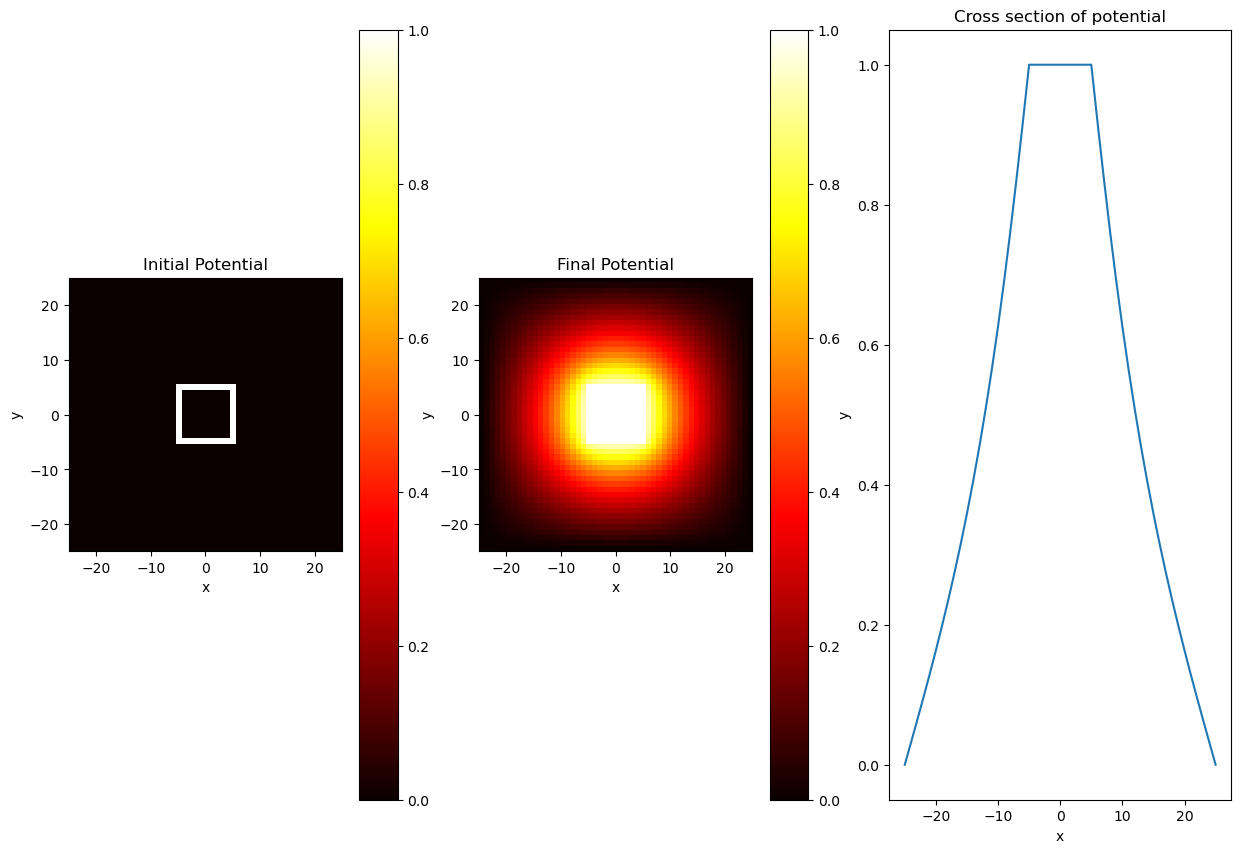

In [13]:
#Problem 2:

#Defining the size of the graph:

R = 25
s = int(R/5)
convergence = 0.001

#Setting up the image:

fig, axs = plt.subplots(1,3,figsize = [15,10])

#Creating the coordinates:

coords = np.mgrid[-R:R+1,-R:R+1]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

#Creating the potential array:

V = np.zeros((2*R + 1,2*R + 1))
V[R+s,R-s:R+s] = 1
V[R-s,R-s:R+s] = 1
V[R-s:R+s+1,R+s] = 1
V[R-s:R+s,R-s] = 1

V_old = np.copy(V)

V_new = relaxation_new(V,R,s,convergence)

image1 = axs[0].imshow(V_old,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
image2 = axs[1].imshow(V_new,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
fig.colorbar(image1,ax = axs[0])
fig.colorbar(image2,ax = axs[1])

y = V_new[R,:]
x = np.linspace(-R,R,2*R + 1)

image3 = axs[2].plot(x,y)

#Setting the axis labels:

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Initial Potential')

axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Final Potential')

axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Cross section of potential')


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\2335465978.py:37: RuntimeWarning: divide by zero encountered in divide
  test = np.abs((v_old - v_new) / v_old)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\2335465978.py:37: RuntimeWarning: invalid value encountered in divide
  test = np.abs((v_old - v_new) / v_old)


Number of pixels:  10000
Iterations for R= 50 : 1407
Iterations per pixel:  0.1407


Text(0.5, 1.0, 'Cross section of potential')

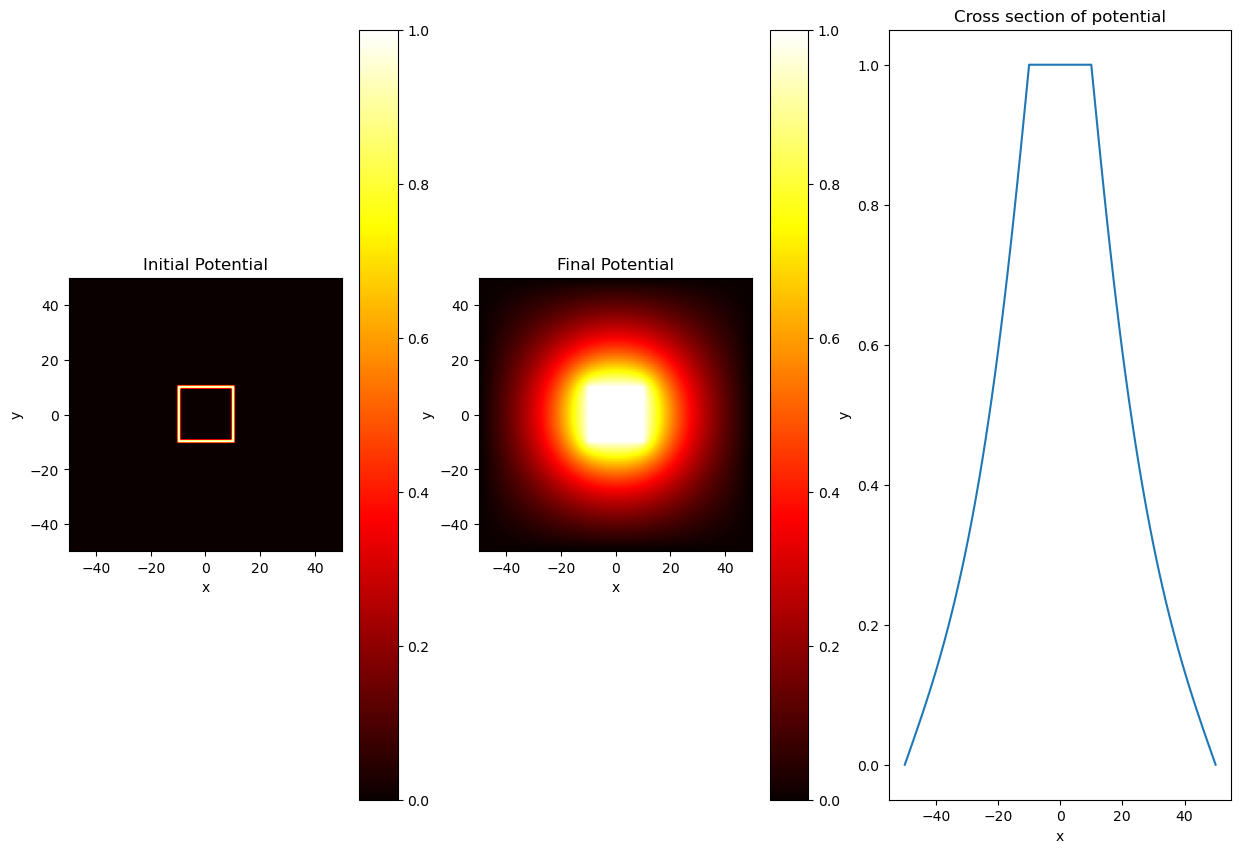

In [12]:
#Problem 2 Continued:

#Defining the size of the graph:

R = 50
s = int(R/5)
convergence = 0.001

#Setting up the image:

fig, axs = plt.subplots(1,3,figsize = [15,10])

#Creating the coordinates:

coords = np.mgrid[-R:R+1,-R:R+1]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

#Creating the potential array:

V = np.zeros((2*R + 1,2*R + 1))
V[R+s,R-s:R+s] = 1
V[R-s,R-s:R+s] = 1
V[R-s:R+s+1,R+s] = 1
V[R-s:R+s,R-s] = 1

V_old = np.copy(V)

V_new = relaxation_new(V,R,s,convergence)

image1 = axs[0].imshow(V_old,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
image2 = axs[1].imshow(V_new,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
fig.colorbar(image1,ax = axs[0])
fig.colorbar(image2,ax = axs[1])

y = V_new[R,:]
x = np.linspace(-R,R,2*R + 1)

image3 = axs[2].plot(x,y)

#Setting the axis labels:

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Initial Potential')

axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Final Potential')

axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Cross section of potential')


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\2335465978.py:37: RuntimeWarning: divide by zero encountered in divide
  test = np.abs((v_old - v_new) / v_old)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\2335465978.py:37: RuntimeWarning: invalid value encountered in divide
  test = np.abs((v_old - v_new) / v_old)


Number of pixels:  40000
Iterations for R= 100 : 3197
Iterations per pixel:  0.079925


Text(0.5, 1.0, 'Cross section of potential')

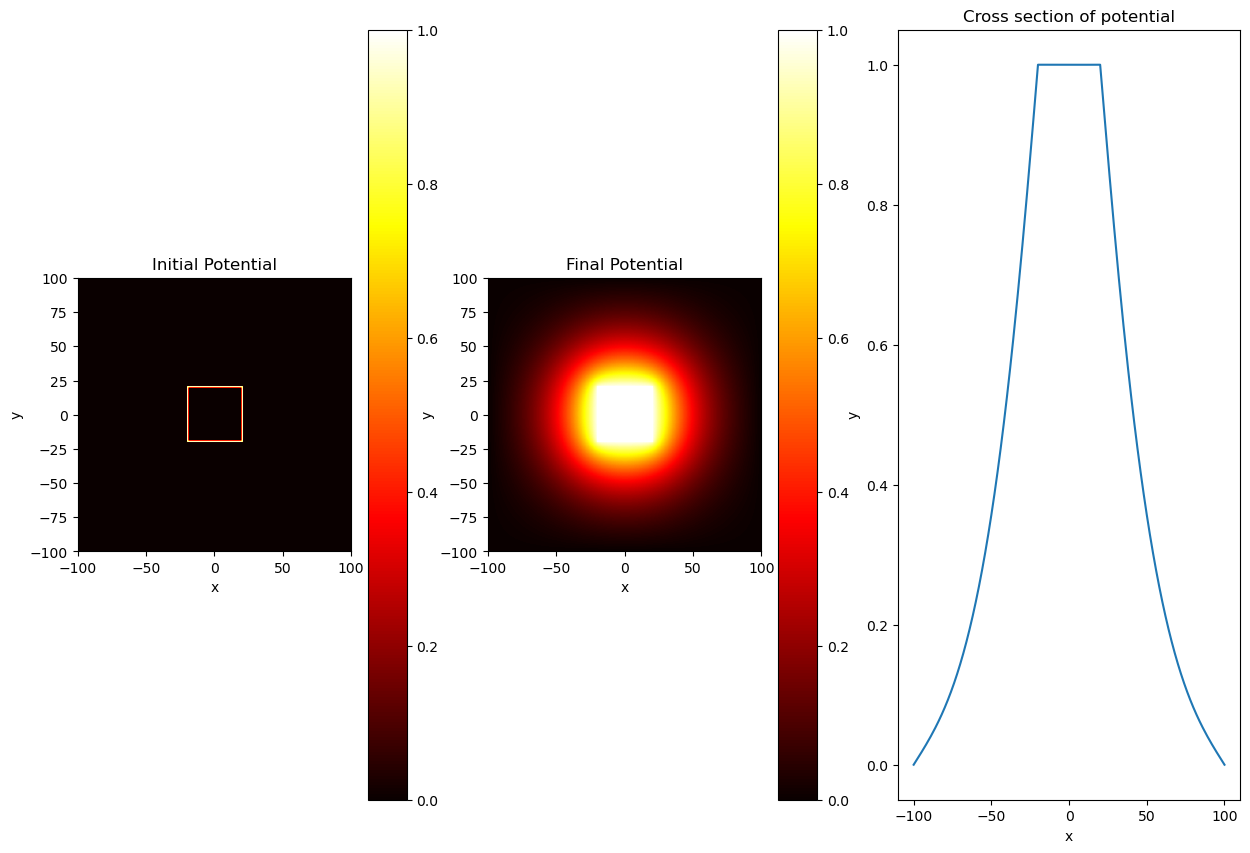

In [11]:
#Problem 2 Continued:

#Defining the size of the graph:

R = 100
s = int(R/5)
convergence = 0.001

#Setting up the image:

fig, axs = plt.subplots(1,3,figsize = [15,10])

#Creating the coordinates:

coords = np.mgrid[-R:R+1,-R:R+1]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

#Creating the potential array:

V = np.zeros((2*R + 1,2*R + 1))
V[R+s,R-s:R+s] = 1
V[R-s,R-s:R+s] = 1
V[R-s:R+s+1,R+s] = 1
V[R-s:R+s,R-s] = 1

V_old = np.copy(V)

V_new = relaxation_new(V,R,s,convergence)

image1 = axs[0].imshow(V_old,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
image2 = axs[1].imshow(V_new,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
fig.colorbar(image1,ax = axs[0])
fig.colorbar(image2,ax = axs[1])

y = V_new[R,:]
x = np.linspace(-R,R,2*R + 1)

image3 = axs[2].plot(x,y)

#Setting the axis labels:

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Initial Potential')

axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Final Potential')

axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Cross section of potential')

Problem 2 Analysis:

The number of iterations does not increase linearly with the number of pixels. The rough trend appears to be that the number of iterations doubles when the radius is multiplied by a factor of two. 

In [8]:
#Redefining the relaxation function:

def relaxation_part3(v,R,s,convergence):
    v_old = v
    counter = 0
    #for i in range(1000):
    while True:
        #Using np.roll
        counter += 1
        xshiftR = np.roll(v_old,1,1)
        xshiftL = np.roll(v_old,-1,1)
        yshiftR = np.roll(v_old,1,0)
        yshiftL = np.roll(v_old,-1,0)
        
        #Creating the updated grid
        v_new = 0.25*(xshiftR + xshiftL + yshiftR + yshiftL)
        
        #Setting the boundaries to be 1:
        v_new[R,:] = 1
        v_new[:,R] = 1

        v_new[0,:] = 0
        v_new[-1,:] = 0
        v_new[:,0] = 0
        v_new[:,-1] = 0

        test = np.abs((v_old - v_new) / v_old)
        masked = ma.masked_invalid(test)
        #print('convergence: ',masked)
        if(counter > 10):
            if(np.max(masked) < convergence):
                print('Number of pixels: ',4*R*R)
                print('Iterations for R=',R,':',counter)
                print('Iterations per pixel: ',counter/(4*R*R))
                break
        v_old = v_new
    return v_new


Number of pixels:  2500
Iterations for R= 25 : 437
Iterations per pixel:  0.1748


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\4208148105.py:27: RuntimeWarning: divide by zero encountered in divide
  test = np.abs((v_old - v_new) / v_old)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\4208148105.py:27: RuntimeWarning: invalid value encountered in divide
  test = np.abs((v_old - v_new) / v_old)


Text(0.5, 1.0, 'Cross section of potential')

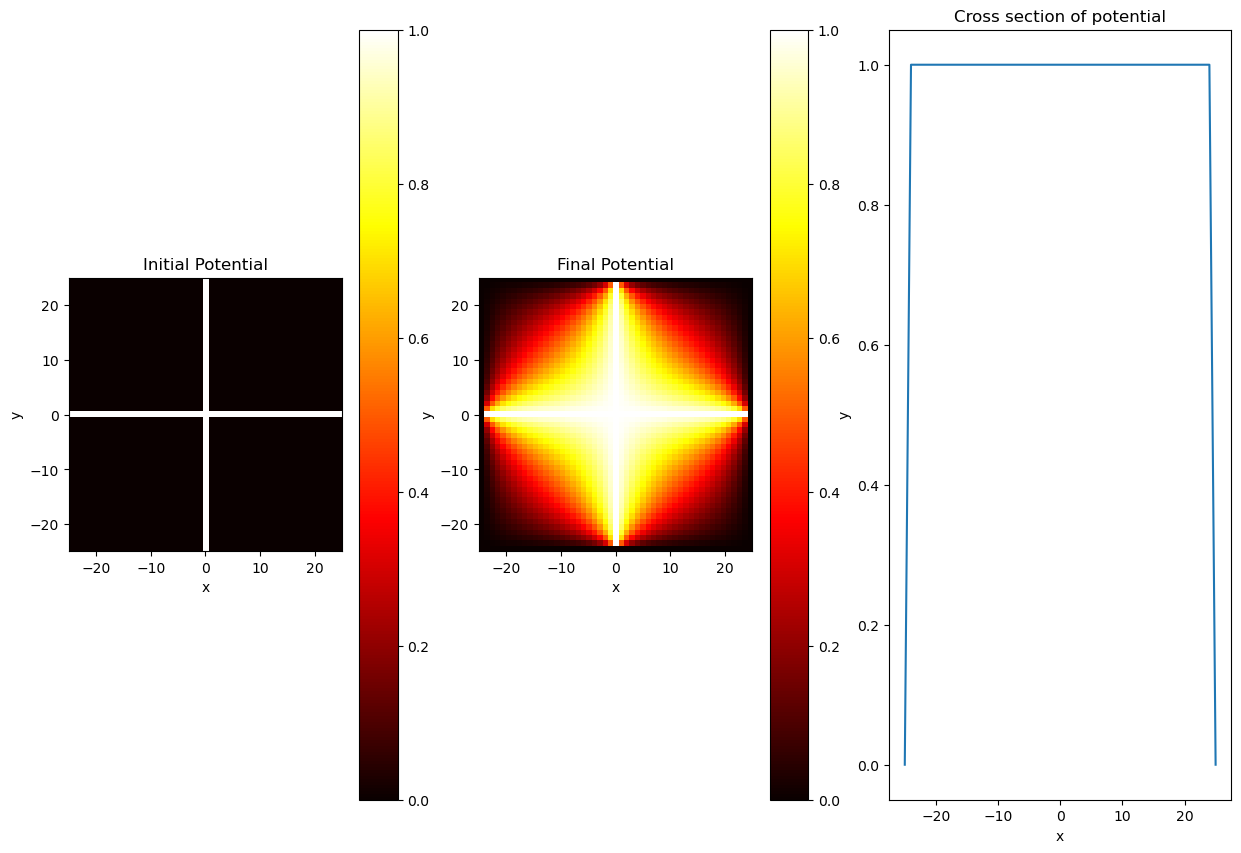

In [16]:
#Part 3:

R = 25
s = int(R/5)
convergence = 0.001

#Setting up the image:

fig, axs = plt.subplots(1,3,figsize = [15,10])

#Creating the coordinates:

coords = np.mgrid[-R:R+1,-R:R+1]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

#Creating the potential array:

V = np.zeros((2*R + 1,2*R + 1))
V[25,:] = 1
V[:,25] = 1

V_old = np.copy(V)

V_new = relaxation_part3(V,R,s,convergence)

image1 = axs[0].imshow(V_old,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
image2 = axs[1].imshow(V_new,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
fig.colorbar(image1,ax = axs[0])
fig.colorbar(image2,ax = axs[1])

y = V_new[R,:]
x = np.linspace(-R,R,2*R + 1)

image3 = axs[2].plot(x,y)

#Setting the axis labels:

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Initial Potential')

axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Final Potential')

axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Cross section of potential')


In [24]:
#Updated relaxation function:

def relaxation_part4(v,R,s,convergence):
    v_old = v
    counter = 0
    #for i in range(1000):
    while True:
        #Using np.roll
        counter += 1
        xshiftR = np.roll(v_old,1,1)
        xshiftL = np.roll(v_old,-1,1)
        yshiftR = np.roll(v_old,1,0)
        yshiftL = np.roll(v_old,-1,0)

        #Creating the initial condition:

        upper = int(R+(R/5))
        lower = int(R-(R/5))
        
        #Creating the updated grid
        v_new = 0.25*(xshiftR + xshiftL + yshiftR + yshiftL)
        
        #Setting the boundaries to be 1:
        v_new[upper,:] = 1
        v_new[lower,:] = 0

        #No longer set boundaries of plot to be V=0 for PBC

        #Setting the V=0 potentials:

        v_new[upper+1,:] = 0
        v_new[lower-1,:] = 0

        test = np.abs((v_old - v_new) / v_old)
        masked = ma.masked_invalid(test)
        #print('convergence: ',masked)
        if(counter > 10):
            if(np.max(masked) < convergence):
                print('Number of pixels: ',4*R*R)
                print('Iterations for R=',R,':',counter)
                print('Iterations per pixel: ',counter/(4*R*R))
                break
        v_old = v_new
    return v_new


C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\3375134627.py:34: RuntimeWarning: divide by zero encountered in divide
  test = np.abs((v_old - v_new) / v_old)
C:\Users\Jeremy Koertzen\AppData\Local\Temp\ipykernel_19320\3375134627.py:34: RuntimeWarning: invalid value encountered in divide
  test = np.abs((v_old - v_new) / v_old)


Number of pixels:  40000
Iterations for R= 100 : 1040
Iterations per pixel:  0.026


Text(0.5, 1.0, 'Cross section of potential')

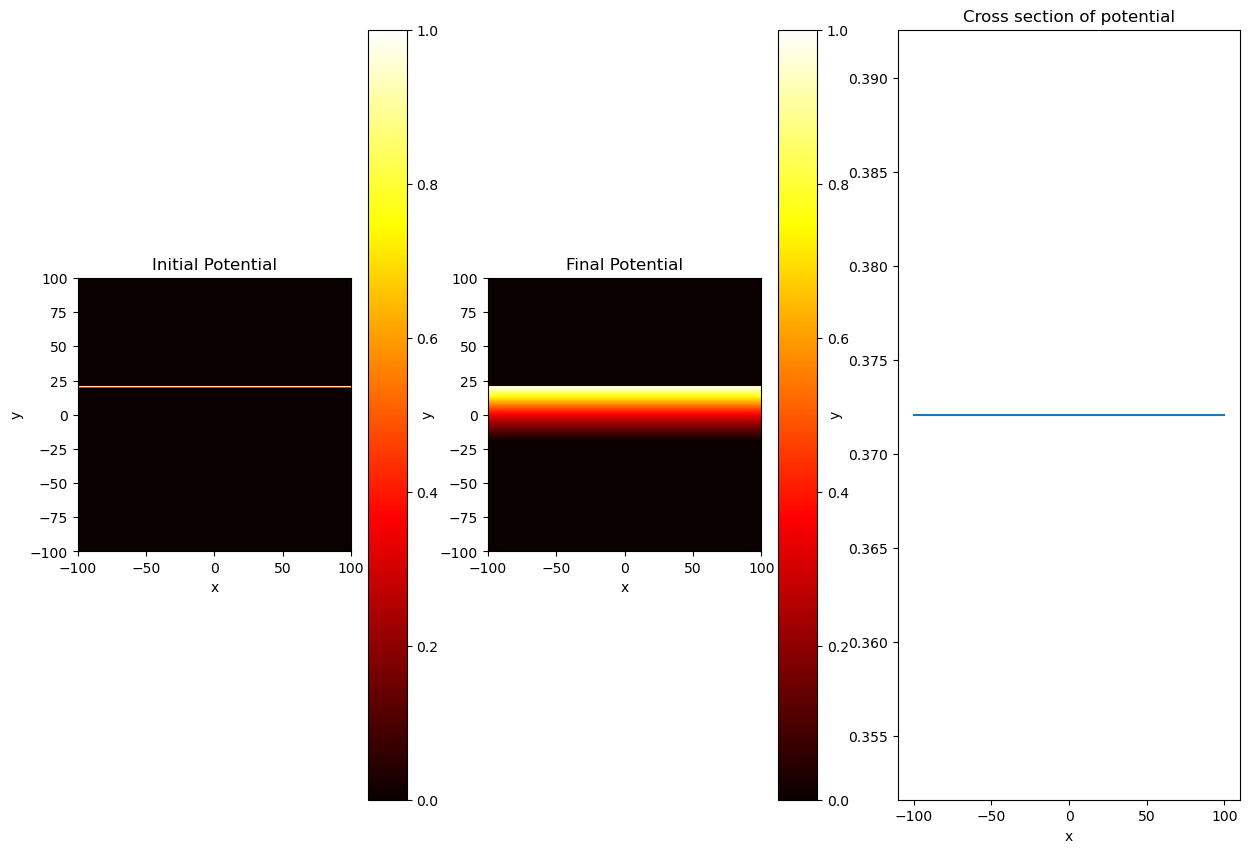

In [27]:
#Problem 4:

R = 100
s = int(R/5)
convergence = 0.001

#Setting up the image:

fig, axs = plt.subplots(1,3,figsize = [15,10])

#Creating the coordinates:

coords = np.mgrid[-R:R+1,-R:R+1]
xgrid = coords[1,:,:]
ygrid = coords[0,:,:]

#Creating the potential array:

upper = int(R+(R/5))
lower = int(R-(R/5))
V = np.zeros((2*R + 1,2*R + 1))
V[upper,:] = 1
V[lower,:] = 0

V_old = np.copy(V)

V_new = relaxation_part4(V,R,s,convergence)

image1 = axs[0].imshow(V_old,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
image2 = axs[1].imshow(V_new,extent=[-R,R,-R,R],origin='lower',cmap = 'hot')
fig.colorbar(image1,ax = axs[0])
fig.colorbar(image2,ax = axs[1])

y = V_new[R,:]
x = np.linspace(-R,R,2*R + 1)

image3 = axs[2].plot(x,y)

#Setting the axis labels:

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Initial Potential')

axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Final Potential')

axs[2].set_xlabel('x')
axs[2].set_ylabel('y')
axs[2].set_title('Cross section of potential')

#The potential is 0 outside the plates for me, so I am not sure what 
#I did wrong. 
